In [1]:
import os; work_dir = "../../"; os.chdir(work_dir); work_dir = os.getcwd(); print("Current working directory:", work_dir)

Current working directory: /home/wilf/Desktop/python_workspace/PCD_SM-Fluid-Pred


In [2]:
from results.data import multiple_GT_loading, make_results_dicts, load_multiple_results
from results.variables import method_strings, regularization, sde_names, test_cases
from results.JHTDB_128tra.variables import mean, std
import matplotlib.pyplot as plt
import numpy as np

IDs = ['y2025_m04_d24_11h_11m_40s', 'y2025_m04_d09_23h_16m_29s', 'y2025_m04_d28_08h_53m_22s',
       'y2025_m04_d24_00h_29m_31s', 'y2025_m04_d24_03h_35m_40s', 'y2025_m04_d24_06h_14m_58s']

perona = False


dataKwargs = dict(test_cases=test_cases, means=mean, stds=std, dataset_name=(dataset_name:="JHTDB"))
strKwargs = dict(any_method_string=method_strings[0], any_ID=IDs[0], any_version=1)

GTs, fields_name = multiple_GT_loading(**strKwargs, **dataKwargs); print(fields_name)
GT_1, GT_2, GT_3 = GTs[1], GTs[2], GTs[3]

# Form: test_set = {"GT": {"pred": GT_1},
# "regFalse": {sde: {} for sde in sde_names}, "regTrue": {sde: {} for sde in sde_names}}
empty_test_sets = make_results_dicts(GTs, regularization, sde_names, test_cases)  # test_set_1, ... =

['velocity_x', 'velocity_y', 'density', 'pressure', 'mach']


In [3]:
from results.JHTDB_128tra.variables import fields_name, fields_name_latex, versions; print(fields_name)

['velocity $u$', 'velocity $v$', 'density $\\rho$', 'pressure $P$', 'mach $Ma$']


In [4]:
dataKwargs = dict(means=mean, stds=std, dataset_name=dataset_name, mask=(mask:=GTs["mask"]))
casesKwargs = dict(empty_test_sets=empty_test_sets, versions=versions, test_cases=test_cases)
test_sets = load_multiple_results(method_strings, IDs, regularization, sde_names, **casesKwargs, **dataKwargs)

 # e.g. test_set_1["regTrue"]["vpsde"]["pred"][42]
test_set_1, test_set_2, test_set_3 = test_sets[1], test_sets[2], test_sets[3]

In [5]:
from results.operations import GT_measures, pred_measures


n_bins = 200

GT_measures(test_set_1, fields_name, n_bins, dataset_name=dataset_name)
GT_measures(test_set_2, fields_name, n_bins, dataset_name=dataset_name)
GT_measures(test_set_3, fields_name, n_bins, dataset_name=dataset_name)

for version in versions:
    # e.g. test_set_1["regTrue"]["vpsde"]["spatial_histogram"][42][2], the 3rd field
    # After key measure is input, input [version] except for GT
    pred_measures(test_set_1, version, regularization, sde_names, fields_name, n_bins, dataset_name=dataset_name, perona=perona)
    pred_measures(test_set_2, version, regularization, sde_names, fields_name, n_bins, dataset_name=dataset_name, perona=perona)
    pred_measures(test_set_3, version, regularization, sde_names, fields_name, n_bins, dataset_name=dataset_name, perona=perona)

In [6]:
fs_label = 14
fs_titles = 14
fs_x_label = 14
fs_y_label = 14
fs_ticks = 14
fs_legend = 14

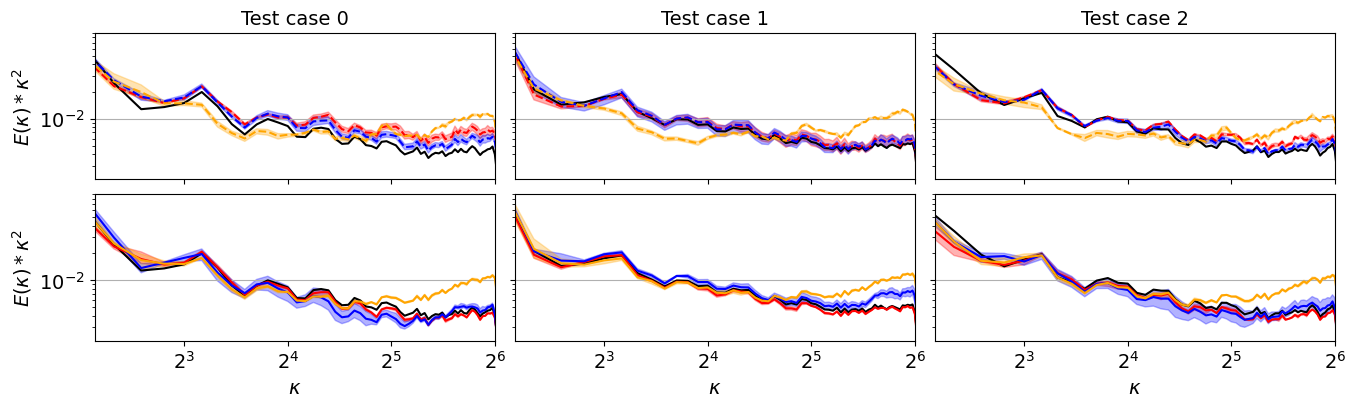

In [7]:
version = 1
test_cases = [test_set_1, test_set_2, test_set_3]

fac = 2
fig, axes = plt.subplots(2,3, figsize=(8*fac,2*fac))

axes[0,0].set_ylabel(r"$E(\kappa)*\kappa^{2}$", fontsize=fs_y_label)
axes[1,0].set_ylabel(r"$E(\kappa)*\kappa^{2}$", fontsize=fs_y_label)
colors = ["red", "blue", "orange"]


for i, ax in enumerate(axes[0,:]):
    test_case = test_cases[i]
    k, E_k_GT = test_case["GT"]["spectra"]["k"], test_case["GT"]["spectra"]["E_k"]
    ax.plot(k, E_k_GT * np.square(k), color="black")

    for ii, sde in enumerate(sde_names):
        k_i, E_k_i = test_case["regFalse"][sde]["spectra"][version]["k"], test_case["regFalse"][sde]["spectra"][version]["E_k"]

        data = np.stack([test_case["regFalse"][sde]["spectra"][v]["E_k"] * np.square(k) for v in versions], axis=0)
        mean_y = np.mean(data, axis=0)
        low, high = np.percentile(data, 5, axis=0), np.percentile(data, 95, axis=0)

        ax.fill_between(k, low, high, color=colors[ii], alpha=0.3)
        ax.plot(k, mean_y, color=colors[ii], linestyle="--")

    # k_ref = k  # or k[5:20]
    # # amp_ref = 0.1 * np.max(E_k_GT * k**2)
    # kolmogorov_slope = .005 * k_ref**(-5/3 + 2)  # E(k)*k^2 so slope is k^{1/3}
    # ax.plot(k_ref, kolmogorov_slope, "--", color="green")


    ax.set_title('Test case ' + str(i), fontsize=fs_titles)
    ax.set_xscale('log', base=2); ax.set_yscale('log')

    if i>0: ax.set_yticklabels([])
    ax.set_xticklabels([])


    # coeff = .004
    # slope = coeff * k ** (1/3)  # compute slope
    # ax.plot(k, slope, "--", color="green", linewidth=1.0, label=r"$k^{-5/3}$" if i == 0 else None)


for i, ax in enumerate(axes[1,:]):
    test_case = test_cases[i]
    k, E_k_GT = test_case["GT"]["spectra"]["k"], test_case["GT"]["spectra"]["E_k"]
    ax.plot(k, E_k_GT * np.square(k), color="black")

    for ii, sde in enumerate(sde_names):
        data = np.stack([test_case["regTrue"][sde]["spectra"][v]["E_k"] * np.square(k) for v in versions ], axis=0)
        mean_y = np.mean(data, axis=0)
        low, high = np.percentile(data, 5, axis=0), np.percentile(data, 95, axis=0)

        ax.fill_between(k, low, high, color=colors[ii], alpha=0.3)
        ax.plot(k, mean_y, color=colors[ii], linestyle="-")

    ax.set_xlabel(r"$\kappa$", fontsize=fs_x_label)
    ax.set_xscale('log', base=2); ax.set_yscale('log')


    if i>0: ax.set_yticklabels([])


[(ax.set_ylim(10e-4*2.1, 10e-3*9), ax.set_xlim(2**2*1.1, 2**6), ax.yaxis.grid(True), ax.tick_params(axis='both', labelsize=fs_ticks)) for ax in axes.flatten()]

plt.subplots_adjust(hspace=.1)
plt.subplots_adjust(wspace=.05)


plt.savefig('../../JHTDB/JHTDB_spectra.png', dpi=500, bbox_inches='tight')  # bbox_inches='tight' or the legend is cut off
plt.show()

In [8]:
from results.plotting import emphasized_cmap

to_sci_2dp = lambda x: f"{x:.2e}"
custom_jet_high_detail = emphasized_cmap("Spectral_r")

ratio_xy = 1/2  # frames of 64 by 128
coeff = 4

/tmp/ipykernel_11388/3140685223.py:15: RuntimeWarning: invalid value encountered in divide
  pred_3 = np.abs((pred_1 - GT )/ GT)
/tmp/ipykernel_11388/3140685223.py:16: RuntimeWarning: invalid value encountered in divide
  pred_4 = np.abs((pred_2 - GT )/ GT)


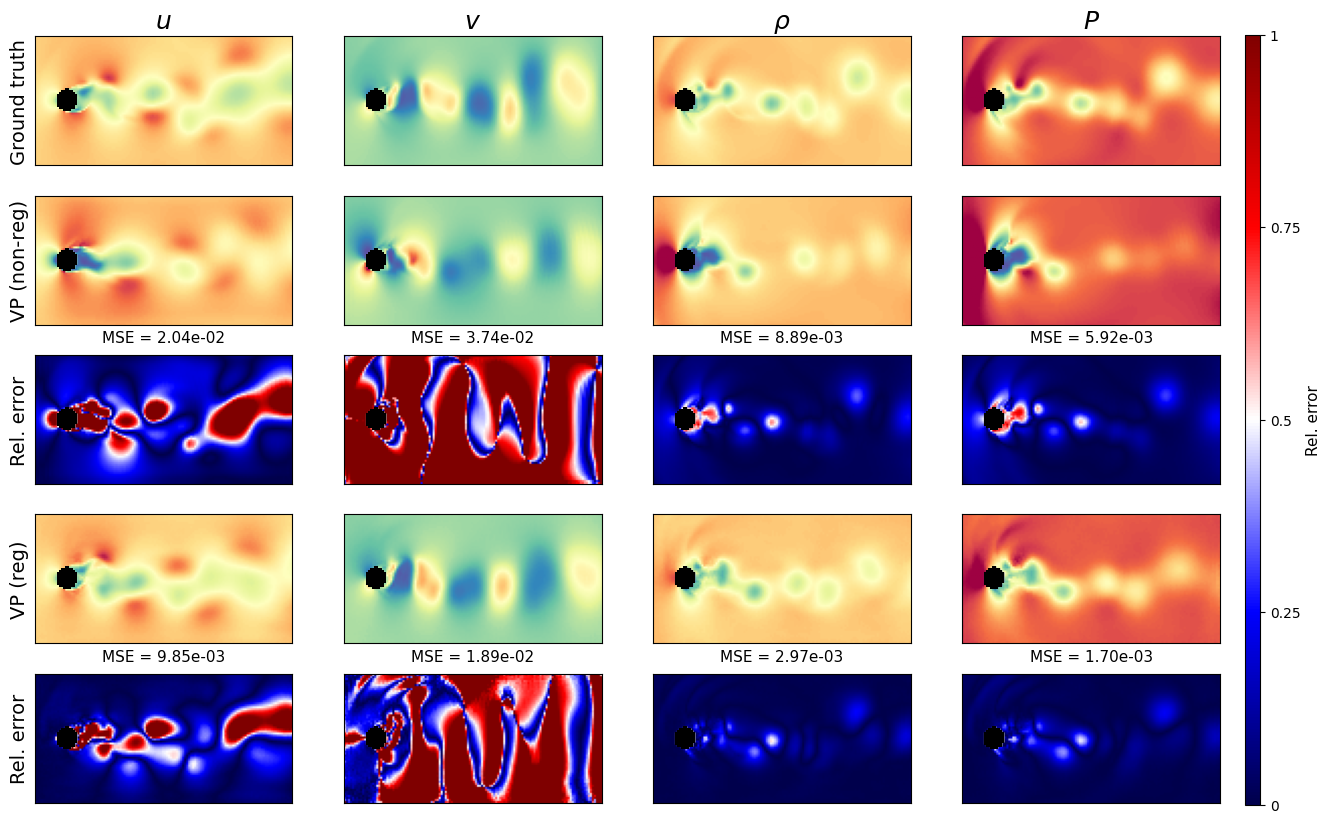

In [9]:
from results.plotting import compa_time_series_err


time = 59
test_set = test_set_3
fields = [0,1,2,3]

sde = "vpsde"
version = 3

# --- time series ---
GT = test_set["GT"]["pred"]
pred_1 = test_set["regFalse"][sde]["pred"][version]
pred_2 = test_set["regTrue"][sde]["pred"][version]
pred_3 = np.abs((pred_1 - GT )/ GT)
pred_4 = np.abs((pred_2 - GT )/ GT)

MSE_1 = test_set["regFalse"][sde]["MSE"][version]
MSE_2 = test_set["regTrue"][sde]["MSE"][version]

GT = np.expand_dims(GT[time, fields, :, :], axis=0)
pred_1 = np.expand_dims(pred_1[time, fields, :, :], axis=0)
pred_2 = np.expand_dims(pred_2[time, fields, :, :], axis=0)
pred_3 = np.expand_dims(pred_3[time, fields, :, :], axis=0)
pred_4 = np.expand_dims(pred_4[time, fields, :, :], axis=0)

time_steps, n_fields, Lx, Ly = GT.shape

vmin = [min(np.min(GT[:, i, ...]), np.min(pred_1[:, i, ...])) for i in range(n_fields)]
vmax = [max(np.max(GT[:, i, ...]), np.max(pred_1[:, i, ...])) for i in range(n_fields)]


MSE_gt = np.expand_dims(np.repeat([None], len(fields)), axis=0)
MSE_1 = np.expand_dims(["MSE = " + to_sci_2dp(x) for x in MSE_1[time, fields]], axis=0)
MSE_2 = np.expand_dims(["MSE = " + to_sci_2dp(x) for x in MSE_2[time, fields]], axis=0)
MSE_3 = np.expand_dims(np.repeat([None], len(fields)), axis=0)
MSE_4 = np.expand_dims(np.repeat([None], len(fields)), axis=0)


time_series = np.concatenate([GT, pred_1, pred_3, pred_2, pred_4], axis=0)

# --- labels ---
x_labels = np.concatenate([MSE_gt, MSE_1, MSE_3, MSE_2, MSE_4], axis=0)
y_labels = ["Ground truth", "VP (non-reg)", "Rel. error", "VP (reg)", "Rel. error"]

# --- titles ---
titles = fields_name
title_string = 'Best of each predictions at time '
suptitle = title_string + fr"$\tau={time}$"
saveKwargs = dict(save_string="../../JHTDB/JHTDB_SDE_compa_fields=" + str(time) + ".png", dpi=600)


titleKwargs = dict(fontsize=18)
suptitleKwargs = dict(fontsize=18)
x_labelsKwargs = dict(fontsize=11)
y_labelsKwargs = dict(fontsize=14)
cbarKwargs = dict(fraction=0.024, pad=0.02)

rgba = np.zeros((*mask.shape, 4))
rgba[..., :3], rgba[..., 3] = 0, (mask == 0).astype(float)

vmin[1] *= .8
vmax[1] *= .8

vmin[2] *= .8
vmax[2] *= .8

# vmin[3] *= .6
vmax[3] *= .6

compa_time_series_err(time_series, fields_name_latex, x_labels, y_labels=y_labels,
                  titleKwargs=titleKwargs, x_labelsKwargs=x_labelsKwargs, y_labelsKwargs=y_labelsKwargs,
                  coeff=coeff, vmin=vmin, vmax=vmax, ratio_xy=ratio_xy, cbarKwargs=cbarKwargs,
                  cmap=custom_jet_high_detail, rgba=rgba, suptitleKwargs=suptitleKwargs, **saveKwargs)

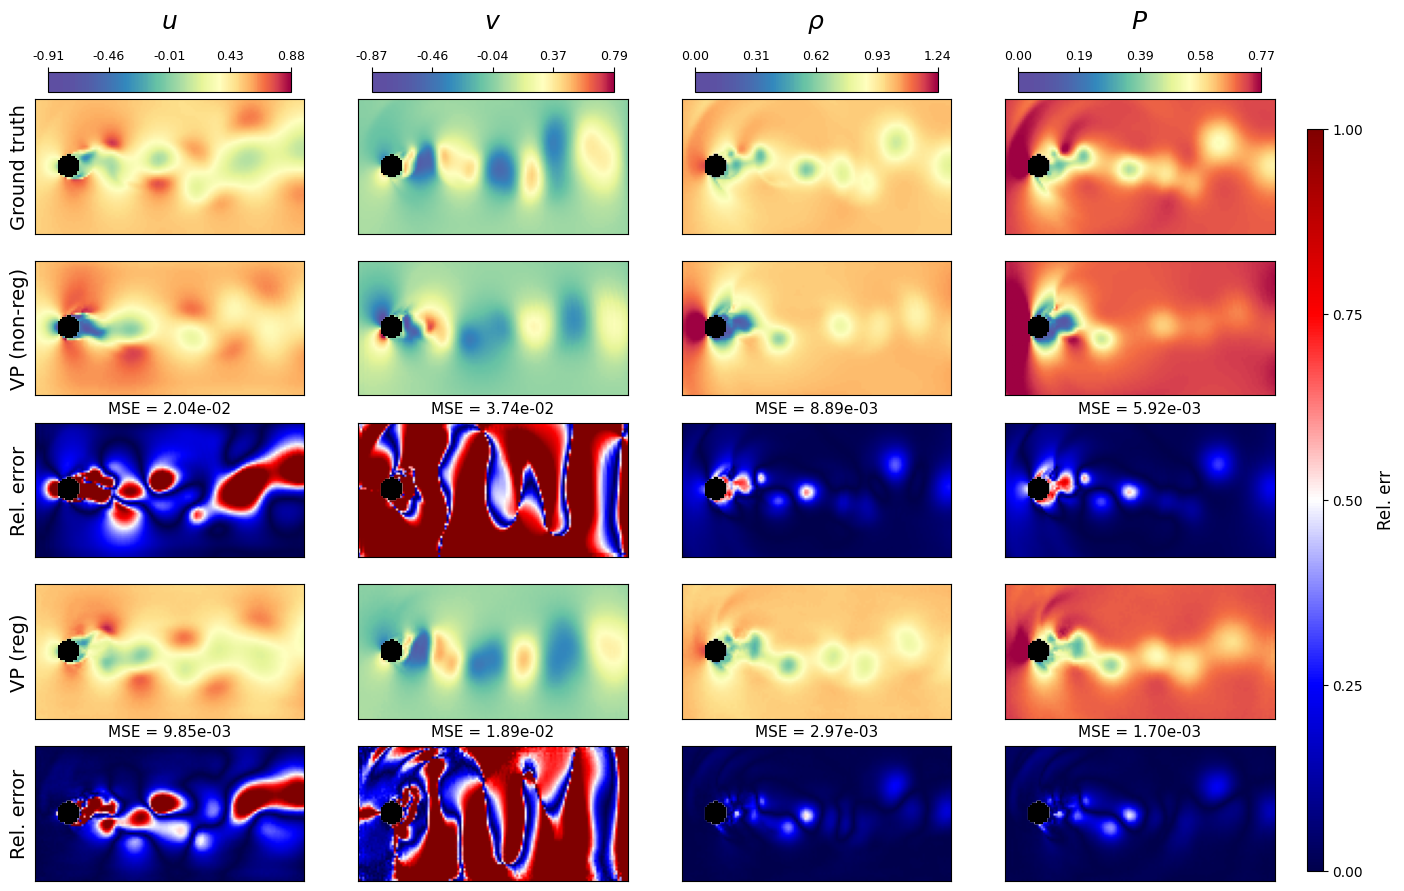

In [10]:
from results.plotting import compa_time_series_err_2

adjustKwargs = dict(wspace=.2, hspace=.2)

left_cbar_args = [0.92, 0.15, 0.01, 0.7]  # [x0, y0, width, height]
top_cbar_args = [0.05, 1.05, 0.9, 0.15]  # [x0, y0, width, height]


compa_time_series_err_2(time_series, fields_name_latex, x_labels, y_labels=y_labels, left_cbar_args=left_cbar_args, top_cbar_args=top_cbar_args, top_label_size=9,
                  titleKwargs=titleKwargs, x_labelsKwargs=x_labelsKwargs, y_labelsKwargs=y_labelsKwargs,
                  coeff=coeff, vmin=vmin, vmax=vmax, ratio_xy=ratio_xy, cbarKwargs=cbarKwargs,
                  cmap=custom_jet_high_detail, rgba=rgba, suptitleKwargs=suptitleKwargs, adjustKwargs=adjustKwargs, **saveKwargs)


In [11]:
from results.plotting import build_latex_table

latex = build_latex_table(
    test_cases       = test_cases,
    sde_names        = ["vpsde", "subvpsde", "vesde"],
    regularization   = regularization,
    measures         = ["MSE",
                        # "RE",
                        "pearson",
                        "KL_divergence",
                        "spectra_log_MSE"],
    measure_labels   = ["$\overline{MSE} \downarrow$",
                        # "$Re$",
                        "$\overline{pearson} \\uparrow$",
                        "$\overline{\mathbb{D}}_{KL} \downarrow$",
                        "$\\text{Log-MSE}$"],
    versions         = versions,
    sde_labels       = ["VP","sub‑VP","VE"],
    regu_labels      = {regularization[0]:"False", regularization[1]:"True"},
    highlight_lowest = [True, False, True, True],   # MSE ↓, ↑, ↓
    pms = [False, False, False, False],
    quart=False
)

print(latex)

\begin{tabular}{|c|c|ccc|ccc|ccc|ccc|}
\hline
\textbf{SDE type} & \textbf{Regularization} & \multicolumn{3}{c|}{$\overline{MSE} \downarrow$ ($10^{-3}$)} & \multicolumn{3}{c|}{$\overline{pearson} \uparrow$ ($10^{-1}$)} & \multicolumn{3}{c|}{$\overline{\mathbb{D}}_{KL} \downarrow$ ($10^{0}$)} & \multicolumn{3}{c|}{$\text{Log-MSE}$ ($10^{-2}$)} \\
\cline{3-5}
\cline{6-8}
\cline{9-11}
\cline{12-14}
VP & False & 2.52 & 1.49 & 2.82 & 9.90 & 9.93 & 9.88 & 5.01 & 1.98 & 5.25 & 2.87 & 0.27 & 0.82 \\
sub‑VP & False & 1.77 & 1.26 & 4.94 & 9.92 & 9.94 & 9.78 & 5.02 & \textbf{1.88} & 5.34 & 0.94 & 0.29 & \textbf{0.27} \\
VE & False & 7.45 & 8.67 & 8.17 & 9.67 & 9.61 & 9.64 & 5.23 & 2.50 & 5.49 & 5.84 & 5.16 & 4.77 \\
\hline
VP & True & \textbf{1.67} & \textbf{1.06} & 3.10 & \textbf{9.93} & \textbf{9.95} & 9.86 & 5.07 & 2.12 & \textbf{5.13} & \textbf{0.20} & \textbf{0.09} & 0.30 \\
sub‑VP & True & 2.40 & 2.41 & 3.55 & 9.89 & 9.89 & 9.84 & 5.05 & 2.23 & 5.22 & 0.84 & 0.84 & 0.79 \\
VE & True & 2.21 &

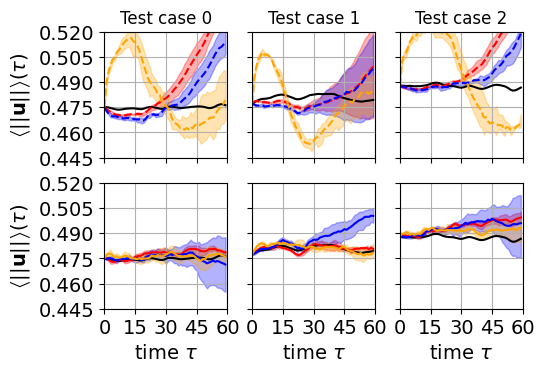

average over versions


In [12]:
test_cases = [test_set_1, test_set_2, test_set_3]

fac = 1.8
fig, axes = plt.subplots(2,3, figsize=(3*fac,2*fac))

str_y = r"$\left\langle \vert\vert \mathbf{u} \vert\vert \right\rangle (\tau)$"
axes[0, 0].set_ylabel(str_y, fontsize=fs_y_label)
axes[1, 0].set_ylabel(str_y, fontsize=fs_y_label)
colors = ["red", "blue", "orange"]


for i, ax in enumerate(axes[0, :]):

    test_case = test_cases[i]

    y = np.mean(test_case["GT"]["mag_U"], axis=(1,2))
    x = np.arange(0, len(y))
    ax.plot(x, y, label="Ground truth", color="black", linestyle="-", markersize=3, markevery=5)

    for ii, sde in enumerate(sde_names):
        versions = test_case["regFalse"][sde]["mag_U"].keys()
        data = np.stack([np.mean(test_case["regFalse"][sde]["mag_U"][v], axis=(1,2)) for v in versions ], axis=0)  # shape: (n_versions, n_points)
        mean_y = np.mean(data, axis=0)
        low, high = np.percentile(data, 5, axis=0), np.percentile(data, 95, axis=0)
        x = np.arange(len(mean_y))

        ax.plot(x, mean_y, color=colors[ii], linestyle="--")
        ax.fill_between(x, low, high, color=colors[ii], alpha=0.3)

    ax.set_title('Test case ' + str(i))
    if i>0: ax.set_yticklabels([])
    ax.set_xticklabels([])

    fac = 1
    support = k[fac:-fac]

for i, ax in enumerate(axes[1, :]):

    test_case = test_cases[i]

    y = np.mean(test_case["GT"]["mag_U"], axis=(1,2))
    x = np.arange(0, len(y))
    ax.plot(x, y, label="Ground truth", color="black", linestyle="-", markersize=3, markevery=5)

    for ii, sde in enumerate(sde_names):

        versions = test_case["regTrue"][sde]["mag_U"].keys()
        data = np.stack([np.mean(test_case["regTrue"][sde]["mag_U"][v], axis=(1,2)) for v in versions ], axis=0)  # shape: (n_versions, n_points)
        mean_y = np.mean(data, axis=0)
        low, high = np.percentile(data, 5, axis=0), np.percentile(data, 95, axis=0)
        x = np.arange(len(mean_y))

        ax.plot(x, mean_y, color=colors[ii], linestyle="-")
        ax.fill_between(x, low, high, color=colors[ii], alpha=0.3)


    ax.set_xlabel("time " r"$\tau$", fontsize=fs_ticks)
    # ax.set_title('Test case ' + str(i))

    if i>0: ax.set_yticklabels([])

for ax in axes.flatten():
    max_y = .52
    min_y = .445
    ax.set_ylim(min_y, max_y)

    ax.set_xticks(np.arange(0, np.max(x)+2, 15))
    ax.set_yticks(np.arange(min_y, max_y + .01, .015))

    ax.set_xlim(0, 60)

    ax.grid(True)

plt.subplots_adjust(hspace=.2, )  # vertical spacing
plt.subplots_adjust(wspace=.2, )  # horizontal spacing


for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=fs_ticks)


plt.savefig('../../JHTDB/JHTDB_mean.png', dpi=500, bbox_inches='tight')  # bbox_inches='tight' or the legend is cut off


plt.show()
print('average over versions')

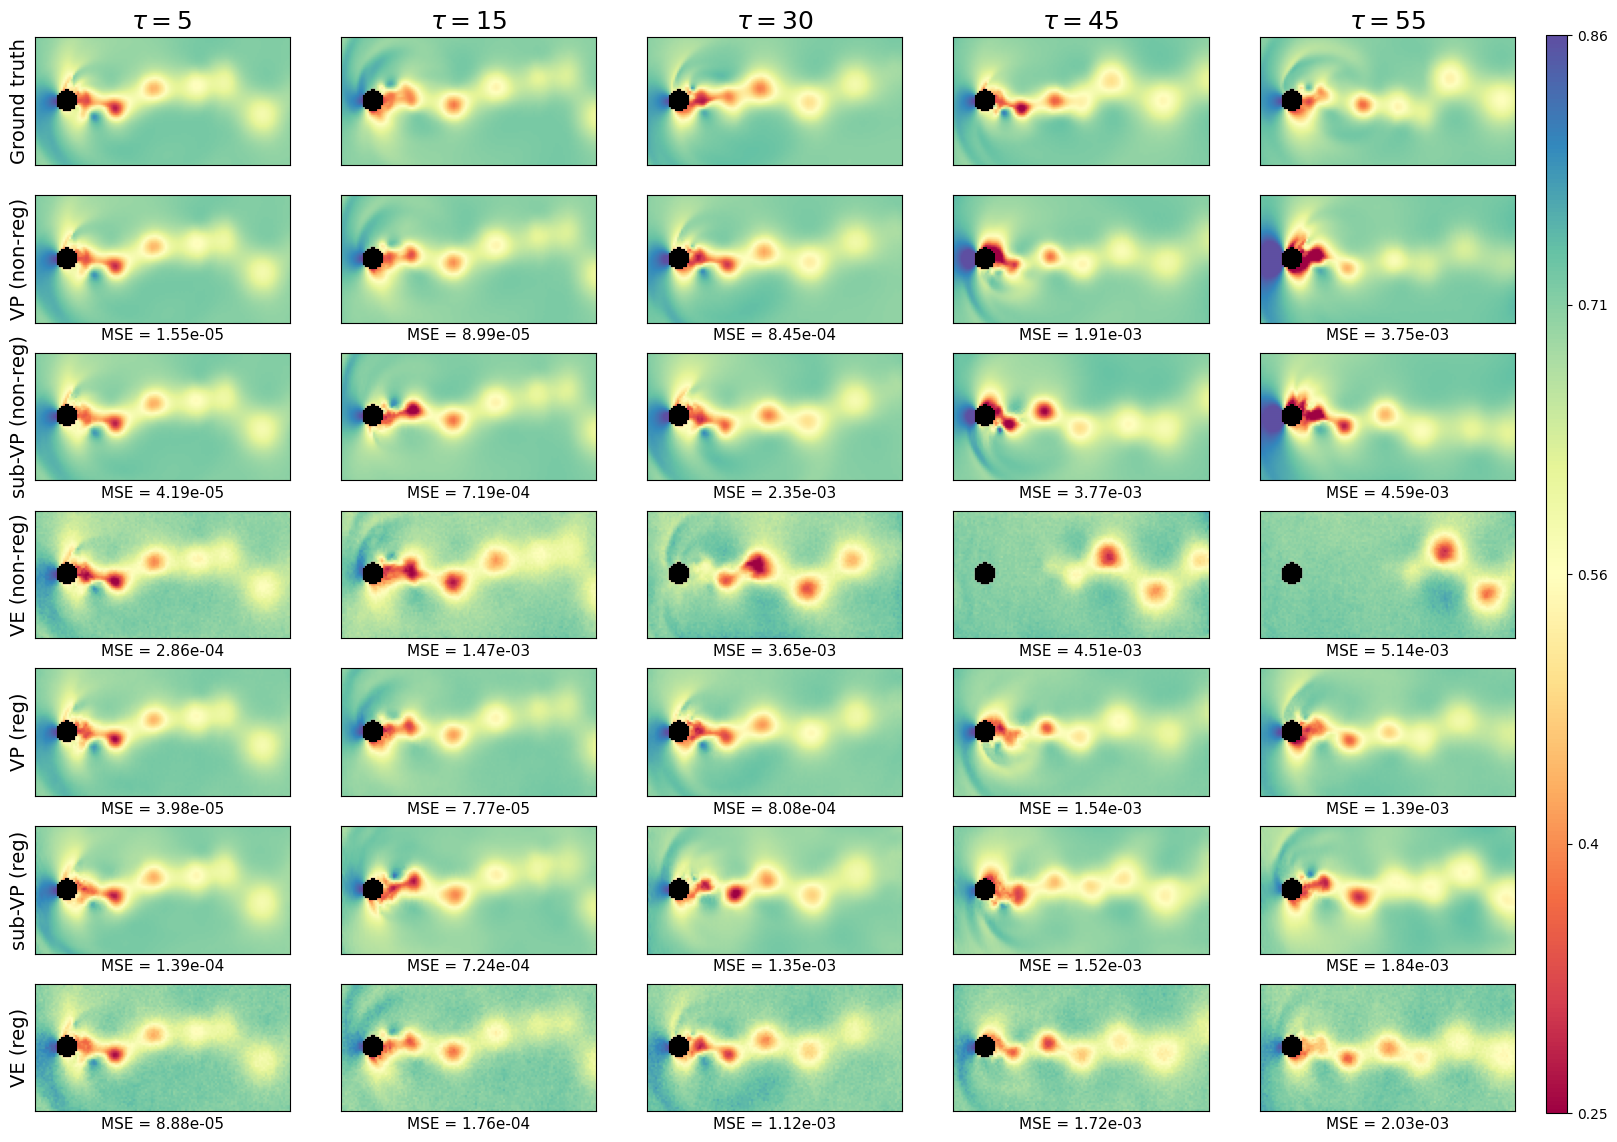

In [13]:
from results.plotting import compa_time_series

version = 2
test_set = test_set_3
field = 3
times = [5, 15, 30, 45, 55]


GT = test_set["GT"]["pred"][times, field, ...]
MSE_gt = np.repeat([None], len(times))


vmin = np.repeat(np.min(GT), len(times)) + .25
vmax = np.repeat(np.max(GT), len(times))

time_series = np.expand_dims(GT, axis=0)
x_labels = np.expand_dims(MSE_gt, axis=0)
y_labels = ["Ground truth"]

for regu in regularization:

    reg_lab = " (non-reg)" if regu == "regFalse" else " (reg)"
    sde_labs = ["VP", "sub-VP", "VE"]

    for sde, sde_lab in zip(sde_names, sde_labs):
        pred = test_set[regu][sde]["pred"][version][times, field, ...]
        pred = np.expand_dims(pred, axis=0)
        time_series = np.concatenate([time_series, pred], axis=0)

        MSE = test_set[regu][sde]["MSE"][version][times, field]
        MSE = np.expand_dims(["MSE = " + to_sci_2dp(x) for x in MSE], axis=0)
        x_labels = np.concatenate([x_labels, MSE], axis=0)
        y_labels.append(sde_lab + reg_lab)


# --- titles ---
titles = [fr"$\tau={time}$" for time in times]
title_string = 'pred'
# suptitle = "Prediction for " + fields_name[field]
suptitle = ""

saveKwargs = dict(save_string="../../JHTDB/JHTDB_time_series_pressure" + ".png", dpi=250)


titleKwargs = dict(fontsize=18)
suptitleKwargs = dict(fontsize=18)
x_labelsKwargs = dict(fontsize=11)
y_labelsKwargs = dict(fontsize=14)
cbarKwargs = dict(fraction=0.025, pad=0.02)

rgba = np.zeros((*mask.shape, 4))
rgba[..., :3], rgba[..., 3] = 0, (mask == 0).astype(float)


compa_time_series(time_series, titles, x_labels, y_labels=y_labels,
                  titleKwargs=titleKwargs, x_labelsKwargs=x_labelsKwargs, y_labelsKwargs=y_labelsKwargs,
                  coeff=coeff, vmin=vmin, vmax=vmax, ratio_xy=ratio_xy, cbarKwargs=cbarKwargs, cbar_labels=np.round(np.linspace(vmin[0], vmax[0], 5), 2),
                  cmap="Spectral", rgba=rgba, suptitle=suptitle, suptitleKwargs=suptitleKwargs, **saveKwargs)

---

---

---



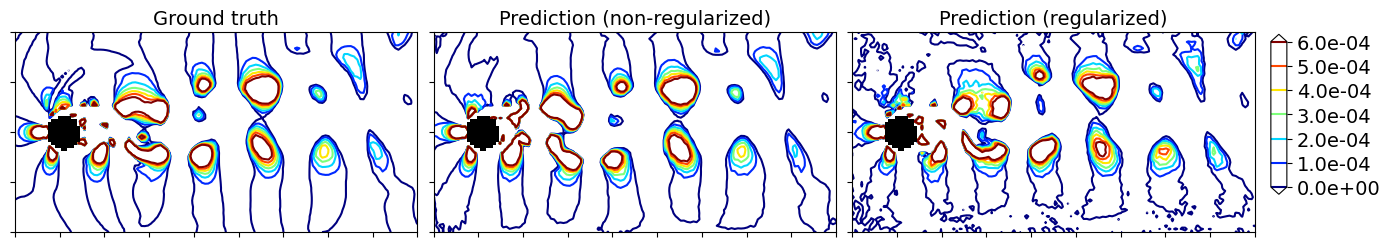

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
import numpy as np
from scipy.ndimage import gaussian_filter


fs_title = 14
fs_suptitle = 14
fs_cb = 14

# Create an RGBA image
rgba = np.zeros((*mask.shape, 4))
rgba[..., :3] = 0  # black
rgba[..., 3] = (mask == 0).astype(float)


# def gaussian_smooth(array, sigma=1.0):
#     return gaussian_filter(array, sigma=sigma)

def plot_iso_lines_with_margin(data, data2, data3, iso_values, t_index, n_ticks, title=None, name=None):

    # Extract 2D slice
    slice2D = data[t_index]  # shape (nx, ny)
    nx, ny = slice2D.shape

    # Build coordinate grid
    x = np.arange(ny)
    y = np.arange(nx)
    X, Y = np.meshgrid(x, y)

    fac = 4
    fig, axes = plt.subplots(1,3, figsize=(fac * 2 * 2, fac * 2 / 2))
    for ax in axes.flat:
        ax.set_xlim(x.min(), x.max())
        ax.set_ylim(y.min(), y.max())
        ax.set_xticks(np.linspace(x.min(), x.max(), 10))
        ax.set_yticks(np.linspace(y.min(), y.max(), 5))

        ax.set_xticklabels([])
        ax.set_yticklabels([])

        # xlim = ax.get_xlim()
        # ylim = ax.get_ylim()
        # # Set ticks to match the limits exactly
        # ax.set_xticks([xlim[0], xlim[1]])
        # ax.set_yticks([ylim[0], ylim[1]])

    cs = axes[0].contour(X, Y, data[t_index], levels=iso_values, origin='lower', cmap='jet', extend='both')
    cs2 = axes[1].contour(X, Y, data2[t_index], levels=iso_values, origin='lower', cmap='jet', extend='both')
    cs3 = axes[2].contour(X, Y, data3[t_index], levels=iso_values, origin='lower', cmap='jet', extend='both')


    cbar_ax = fig.add_axes([.91, 0.4, 0.01, 0.4])  # adjust to taste

    plt.subplots_adjust(right=0.9)  # Make room for the colorbar

    CB = fig.colorbar(cs2, cax=cbar_ax, shrink=1.9)

    # l, b, w, h = axes[1].get_position().bounds
    # ll, bb, ww, hh = CB.ax.get_position().bounds
    # CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])
    #
    formatter = FuncFormatter(lambda x, _: f"{x:.1e}")
    CB.ax.yaxis.set_major_formatter(formatter)
    #
    n_ticks = n_ticks
    vmin, vmax = cs2.get_clim()
    new_ticks = np.linspace(vmin, vmax, n_ticks)
    CB.set_ticks(new_ticks)
    CB.ax.tick_params(labelsize=fs_cb)  # replace 12 with your desired fontsize


    plt.suptitle(title, fontsize=fs_suptitle)
    axes[0].set_title("Ground truth", fontsize=fs_title)
    axes[1].set_title("Prediction (non-regularized)", fontsize=fs_title)
    axes[2].set_title("Prediction (regularized)", fontsize=fs_title)

    axes[0].imshow(rgba, interpolation='none', zorder=100)
    axes[1].imshow(rgba, interpolation='none', zorder=100)
    axes[2].imshow(rgba, interpolation='none', zorder=100)

    plt.subplots_adjust(top=1., )
    plt.subplots_adjust(wspace=.04, )

    # plt.tight_layout()

    plt.savefig('../../' + name + '.png', dpi=500, bbox_inches='tight')  # bbox_inches='tight' or the legend is cut off


    plt.show()

    return cs, cs2, cs3

version = 2
test_set = test_set_2
time = 30
sde = "vpsde"

step = 0.0001
iso_values = np.arange(0., .0007, step)
n_ticks = len(iso_values)
cs_true, cs_pred, _ = plot_iso_lines_with_margin(
                                                 test_set["GT"]["q_crit"],
                                                 test_set["regFalse"][sde]["q_crit"][version],
                                                 test_set["regTrue"][sde]["q_crit"][version], iso_values, t_index=time, n_ticks = n_ticks,
# title=f"Iso-value contours of Q-criterion, " + r"$\tau=$" + f"{time}", name="JHTDB/JHTDB_q_crit_" + str(perona))
title="", name="JHTDB/JHTDB_q_crit_" + str(perona))


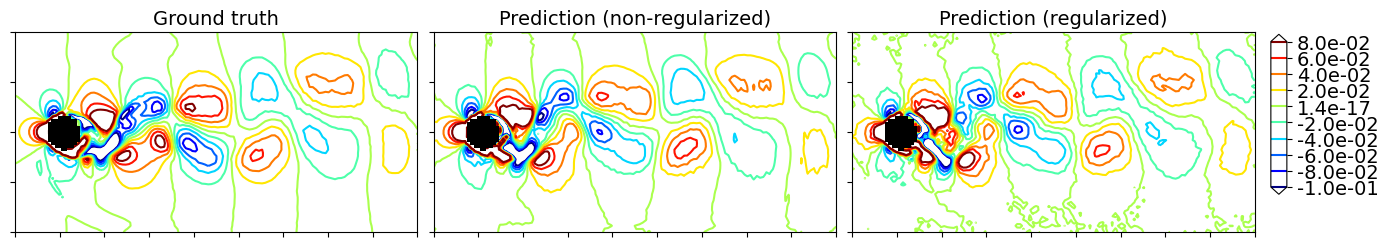

In [15]:
version = 1
test_set = test_set_1
time = 30
step = .02
sde = "vpsde"

iso_values = np.arange(-.1, .1, step)
n_ticks = len(iso_values)
cs_true, cs_pred, _ = plot_iso_lines_with_margin(test_set["GT"]["curl"],
                                                 test_set["regFalse"][sde]["curl"][version],
                                                 test_set["regTrue"][sde]["curl"][version], iso_values, t_index=time, n_ticks = n_ticks,
                                                 # title=f"Iso-value contours of curl, " + r"$\tau=$" + f"{time}", name="JHTDB/JHTDB_curl_" + str(perona))
                                                 title="", name="JHTDB/JHTDB_curl_" + str(perona))
